In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt


##Generate the Dataset

In [19]:
# Parameters for dataset generation
n_samples = 1000  # Number of data points
n_features = 20   # Number of input features
n_informative = 15 # Number of informative features
n_redundant = 5   # Number of redundant features
n_classes = 5     # Number of classes

# Generate the synthetic dataset
X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=n_informative, n_redundant=n_redundant,
                           n_classes=n_classes, random_state=42)


##Visualize the Dataset

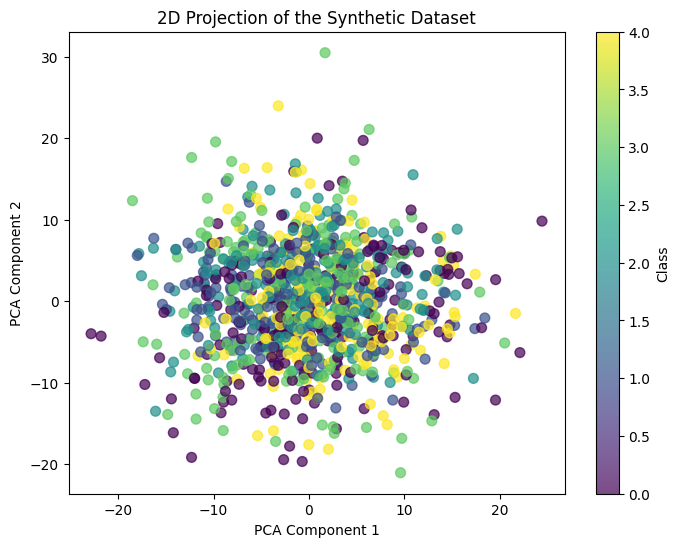

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points in the 2D plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('2D Projection of the Synthetic Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class')
plt.show()


##Convert Labels to One-Hot Encoding (for Neural Network)

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=n_classes)


##Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


#Extend the NeuralNetwork Class for Multi-Class Classification

##Initialize Weights and Biases

In [ ]:
def initialize_weights(self):
    # Example initialization with random weights
    self.weights = [
        np.random.randn(self.input_size, self.hidden_size1),
        np.random.randn(self.hidden_size1, self.hidden_size2),
        np.random.randn(self.hidden_size2, self.hidden_size3),
        np.random.randn(self.hidden_size3, 5)  # 5 output neurons
    ]
    self.biases = [
        np.zeros((1, self.hidden_size1)),
        np.zeros((1, self.hidden_size2)),
        np.zeros((1, self.hidden_size3)),
        np.zeros((1, 5))  # Bias for the output layer
    ]


##Forward Pass

In [ ]:
def softmax(self, z):
    exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def forward(self, X):
    self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
    self.a1 = self.relu(self.z1)
    self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
    self.a2 = self.relu(self.z2)
    self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
    self.a3 = self.relu(self.z3)
    self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
    self.output = self.softmax(self.z4)
    return self.output


##Loss Function

In [ ]:
def compute_loss(self, y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


##Backpropagation

In [ ]:
def backward(self, X, y_true, learning_rate=0.01):
    m = X.shape[0]

    # Output layer gradients
    dZ4 = self.output - y_true
    dW4 = np.dot(self.a3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    # Third hidden layer gradients
    dA3 = np.dot(dZ4, self.weights[3].T)
    dZ3 = dA3 * self.relu_derivative(self.z3)
    dW3 = np.dot(self.a2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Second hidden layer gradients
    dA2 = np.dot(dZ3, self.weights[2].T)
    dZ2 = dA2 * self.relu_derivative(self.z2)
    dW2 = np.dot(self.a1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # First hidden layer gradients
    dA1 = np.dot(dZ2, self.weights[1].T)
    dZ1 = dA1 * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases
    self.weights[3] -= learning_rate * dW4
    self.biases[3] -= learning_rate * db4
    self.weights[2] -= learning_rate * dW3
    self.biases[2] -= learning_rate * db3
    self.weights[1] -= learning_rate * dW2
    self.biases[1] -= learning_rate * db2
    self.weights[0] -= learning_rate * dW1
    self.biases[0] -= learning_rate * db1


##Define the NeuralNetwork Class

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size=5):
        # Initialize weights and biases for each layer
        self.weights = [
            np.random.randn(input_size, hidden_size1),
            np.random.randn(hidden_size1, hidden_size2),
            np.random.randn(hidden_size2, hidden_size3),
            np.random.randn(hidden_size3, output_size)
        ]
        self.biases = [
            np.zeros((1, hidden_size1)),
            np.zeros((1, hidden_size2)),
            np.zeros((1, hidden_size3)),
            np.zeros((1, output_size))
        ]

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
        self.output = self.softmax(self.z4)
        return self.output

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def backward(self, X, y_true, learning_rate=0.01):
        m = X.shape[0]

        # Output layer gradients
        dZ4 = self.output - y_true
        dW4 = np.dot(self.a3.T, dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        # Third hidden layer gradients
        dA3 = np.dot(dZ4, self.weights[3].T)
        dZ3 = dA3 * self.relu_derivative(self.z3)
        dW3 = np.dot(self.a2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        # Second hidden layer gradients
        dA2 = np.dot(dZ3, self.weights[2].T)
        dZ2 = dA2 * self.relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # First hidden layer gradients
        dA1 = np.dot(dZ2, self.weights[1].T)
        dZ1 = dA1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.weights[3] -= learning_rate * dW4
        self.biases[3] -= learning_rate * db4
        self.weights[2] -= learning_rate * dW3
        self.biases[2] -= learning_rate * db3
        self.weights[1] -= learning_rate * dW2
        self.biases[1] -= learning_rate * db2
        self.weights[0] -= learning_rate * dW1
        self.biases[0] -= learning_rate * db1


##Train the Neural Network

In [ ]:
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=64, hidden_size2=64, hidden_size3=64)
epochs = 100
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    output = nn.forward(X_train)

    # Compute loss
    loss = nn.compute_loss(y_train, output)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    # Backward pass
    nn.backward(X_train, y_train, learning_rate)


Epoch 1/100, Loss: 15.060938406447269
Epoch 2/100, Loss: 14.026832353872773
Epoch 3/100, Loss: 14.052395497259825
Epoch 4/100, Loss: 13.037280349318003
Epoch 5/100, Loss: 13.04217410882837
Epoch 6/100, Loss: 10.900459211971102
Epoch 7/100, Loss: 9.003892351189227
Epoch 8/100, Loss: 7.887984381189942
Epoch 9/100, Loss: 6.92465500902068
Epoch 10/100, Loss: 6.331479189170603
Epoch 11/100, Loss: 5.879189117305303
Epoch 12/100, Loss: 5.381268540700222
Epoch 13/100, Loss: 4.877755094029797
Epoch 14/100, Loss: 4.443394411240968
Epoch 15/100, Loss: 4.149063559224028
Epoch 16/100, Loss: 3.8822022424155898
Epoch 17/100, Loss: 3.623315246183492
Epoch 18/100, Loss: 3.38389349943516
Epoch 19/100, Loss: 3.2415247426633687
Epoch 20/100, Loss: 3.0750992569548017
Epoch 21/100, Loss: 2.9585701475524377
Epoch 22/100, Loss: 2.7565152789903458
Epoch 23/100, Loss: 2.58630065164564
Epoch 24/100, Loss: 2.426372734572681
Epoch 25/100, Loss: 2.276810640708912
Epoch 26/100, Loss: 2.1949057353848445
Epoch 27/100,

##Test the Neural Network

In [ ]:
# Forward pass with test data
y_pred = nn.forward(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 31.00%


#Evaluation Metrics

##Import Metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Precision, Recall, F1-Score
print(classification_report(y_true_classes, y_pred_classes))


Accuracy: 31.00%
              precision    recall  f1-score   support

           0       0.19      0.67      0.29        30
           1       0.52      0.28      0.37        46
           2       0.43      0.20      0.28        44
           3       0.42      0.26      0.32        38
           4       0.43      0.24      0.31        42

    accuracy                           0.31       200
   macro avg       0.40      0.33      0.31       200
weighted avg       0.41      0.31      0.31       200



#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


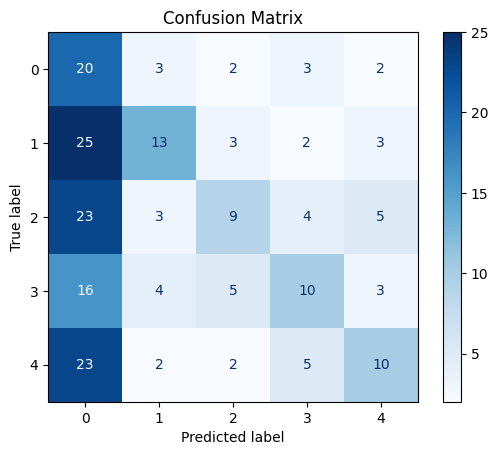

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


#ROC Curve

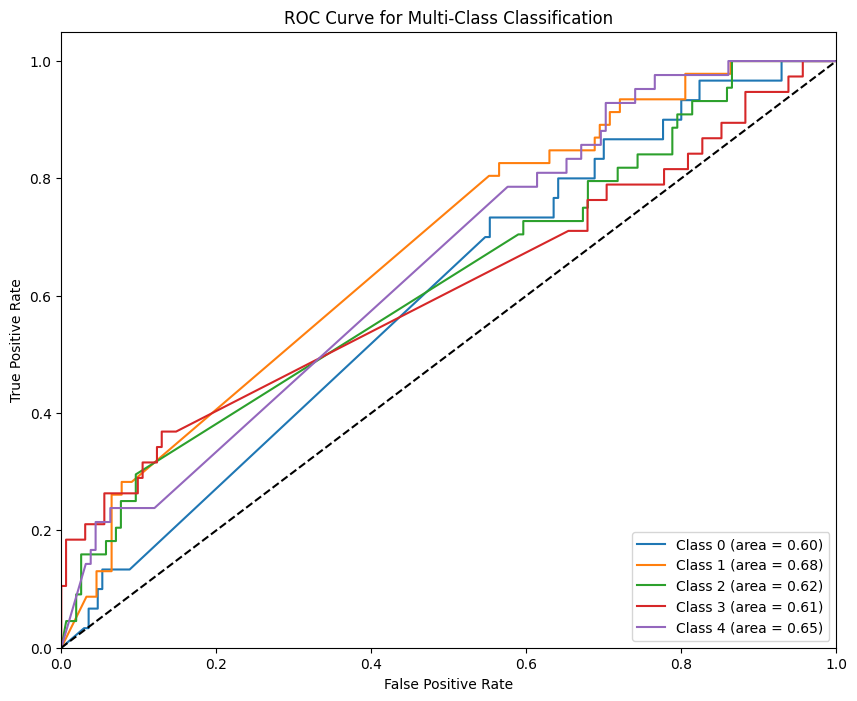

In [ ]:
# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):  # 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


#Full Evaluation

Test Accuracy: 31.00%


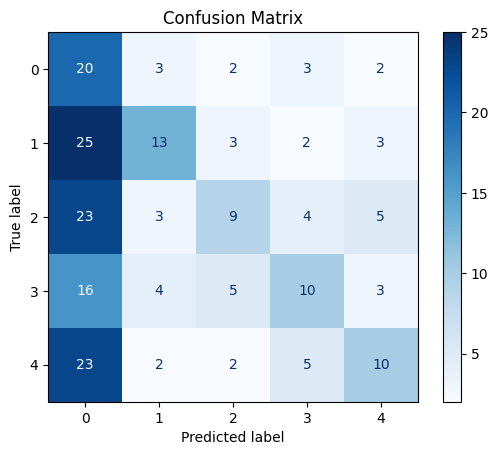

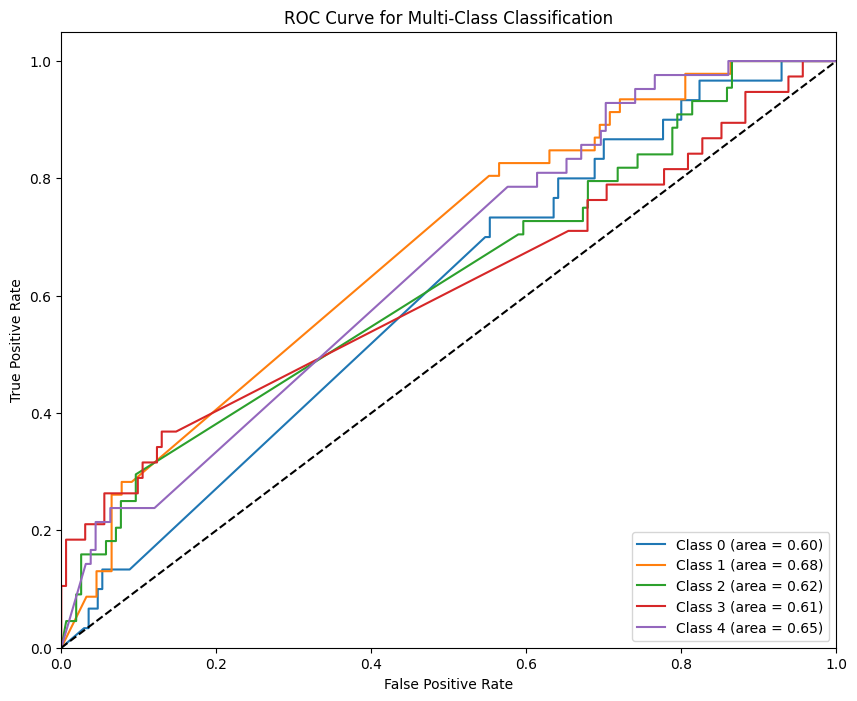

In [ ]:
# After testing the model
y_pred = nn.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):  # 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()
